In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from desispec.io.spectra import read_spectra
from desispec.coaddition import coadd_cameras
import numpy as np
from desitarget.targetmask import desi_mask
from desispec.resolution import Resolution
from scipy.optimize import curve_fit


In [30]:
spec = read_spectra("coadd-main-dark-0-test.fits")
spec0 = spec[1]
print(spec[1])
wave = coadd_cameras(spec0).wave['brz']
res = coadd_cameras(spec0).resolution_data['brz'][0]
R = Resolution(res)
# print(R)

INFO:spectra.py:451:read_spectra: iotime 16.674 sec to read spectra from:  coadd-main-dark-0-test.fits at 2025-07-09T13:55:00.048529


In [31]:
sigArray = []
rArray = []
def gauss(x,sig,A,mu):
    return A*np.exp(-((x-mu)**2) / (2*sig**2))

for i in range(len(wave)):
    if np.nan in kernel:
        sigArray.append(np.nan)
        rArray.append(np.nan)
    elif np.inf in kernel:
        sigArray.append(np.inf)
        rArray.append(np.inf)
    else:
        # Get the resolution kernel (ISF) at pixel i
        kernel = res[:, i]  # shape: (ndiag,), centered at wave[i]

        # Compute the pixel offsets relative to center
        offsets = R.offsets
        kernel_wave = wave[i] + (offsets * np.gradient(wave)[i])
        peak = max(kernel)

        popt, pcov = curve_fit(gauss, kernel_wave, kernel, p0=[0.5, 1, kernel_wave[5]])
        sig_fit, A_fit, mu_fit = popt
        xArray = np.linspace(kernel_wave[0],kernel_wave[10],100)
        sigArray.append(sig_fit)
        print(sig_fit)
        r = kernel_wave[5]/(2*sig_fit*np.sqrt(2*np.log(2)))
        rArray.append(r)

        # # Normalize (optional; usually already normalized)
        # kernel /= np.sum(kernel)

0.7111258612235472
0.7270728515105372
0.7166492040461133
0.6699562774487942
0.6766812521724778
0.6982736208869441
0.7290127663102778
0.6973397239968631
0.6969925667941831
0.6977510100964835
0.6985060341219069
0.7081448111930704
0.6994761138973558
0.7016494848671889
0.6974874970809402
0.7000268329811666
0.6909337214017166
0.7050694118067743
0.7099040679357538
0.7034771458230543
0.6984039717201868
0.6928444402682846
0.6966256379537188
0.6942512078709616
0.7034775791570401
0.6970248294746657
0.692503666633374
0.6984645793902937
0.7013228566773622
0.7018973770519451
0.6950527607052176
0.6987519626316635
0.6984585811821551
0.696237324385211
0.6996416808598396
0.7015657468594514
0.7045407866947547
0.6976584247134805
0.702583843288694
0.6978073951309322
0.693089302350912
0.691907525059191
0.6987881934000213
0.7017494087667581
0.6980187383869654
0.6951918127218958
0.6970215862324446
0.6965903011344964
0.6949821612937412
0.6955977521266403
0.6973540429780818
0.6992557348292716
0.698498856863005

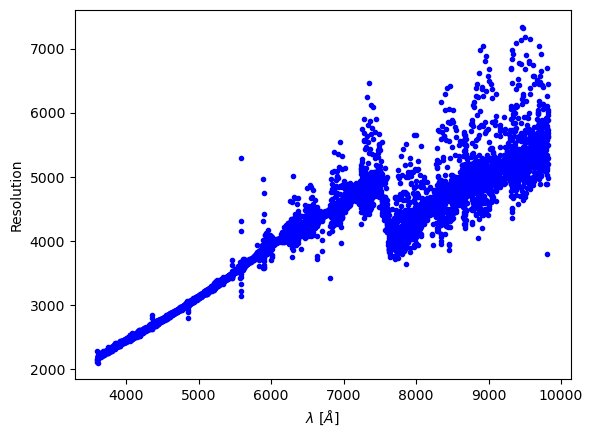

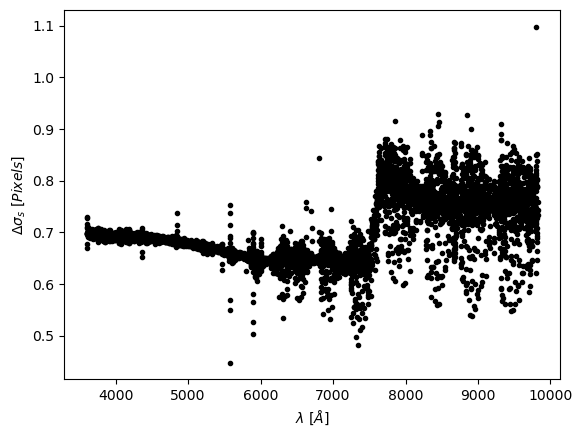

In [32]:
plt.figure(1)
plt.plot(wave,rArray,'b.')
plt.xlabel('$\lambda\ [{\AA}]$')
plt.ylabel('Resolution')


plt.figure(2)
plt.plot(wave,sigArray,'k.')
plt.xlabel('$\lambda\ [{\AA}]$')
plt.ylabel('$\Delta\sigma_{s}\ [Pixels]$');

